In [8]:
import SCellBOW as sb
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata_source=sc.read('./dataset/adata_source_CL.h5ad')
sb.SCellBOW_pretrain(adata_source, 'dummy', vec_size=300, n_worker=1, iter=20)

The save directory is ./dummy/
(8569, 100)
MinMaxScaler(feature_range=(1, 10))


8569it [00:00, 44319.34it/s]


corpus created with size:  8569
Startb Corpus shuffle


100%|████████████████████████████████████| 8569/8569 [00:00<00:00, 38717.42it/s]


Start Training Model
tagging docsX
all docs tagged with len 8569
vocab built

model trained


In [3]:
adata_target=sc.read('./dataset/adata_target_CL.h5ad')
adata = sb.SCellBOW_cluster(adata_target,'dummy').run()

SCellBOW_target
(2394, 100)
MinMaxScaler(feature_range=(1, 10))
(2394, 100)


2394it [00:00, 48124.67it/s]


corpus created with size:  2394
Corpus Not Shuffled 2394


100%|████████████████████████████████████| 2394/2394 [00:00<00:00, 37528.50it/s]

Corpus Shuffled 2394


all docs tagged with len 2394
./dummy/tagged_data
vocab updated


100%|██████████████████████████████████████| 2394/2394 [00:06<00:00, 371.20it/s]


./dummy/vector_embeddings
AnnData object with n_obs × n_vars = 2394 × 100
    obs: 'celltype', 'tech', 'n_genes'
    var: 'genename', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors'
    obsm: 'SCellBOW_embed', 'X_embed'
    obsp: 'distances', 'connectivities'
done leiden
AnnData object with n_obs × n_vars = 2394 × 100
    obs: 'celltype', 'tech', 'n_genes', 'clusters_1.0'
    var: 'genename', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'umap', 'leiden'
    obsm: 'SCellBOW_embed', 'X_embed', 'X_umap'
    obsp: 'distances', 'connectivities'


In [4]:
adata

AnnData object with n_obs × n_vars = 2394 × 100
    obs: 'celltype', 'tech', 'n_genes', 'clusters_1.0'
    var: 'genename', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'umap', 'leiden'
    obsm: 'SCellBOW_embed', 'X_embed', 'X_umap'
    obsp: 'distances', 'connectivities'

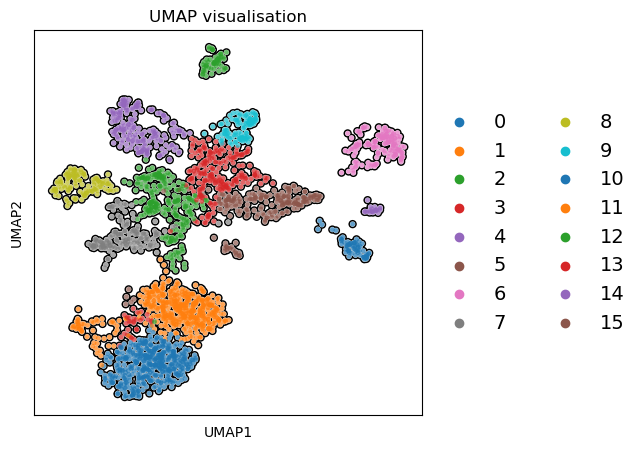

In [9]:
resolution = 1.0
with plt.rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, 
               color='clusters_'+str(resolution), 
               add_outline=True, 
               legend_fontsize=14, 
               legend_fontoutline=2,
               title='UMAP visualisation', 
               size = 50,
               palette=plt.rcParams["axes.prop_cycle"],
              )

In [5]:
adata_train = sc.read("./dataset/adata_train_PA.h5ad")
adata_test = sc.read("./dataset/adata_test_PA.h5ad")


median_score, scores = sb.SCellBOW_algebra(adata_test,adata_train,"dd2",Type="clusters",bootstrap_samples=5,n_top_features=50).run()

/home/namratab/SCellBOW/SCellBOW.py:294: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['type'] = y


Shape of pseudobulk by individual type: (7, 14820)


/home/namratab/anaconda3/envs/scellbow/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


pre: (503, 12767)


/home/namratab/anaconda3/envs/scellbow/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


post: (503, 50)
SCellBOW_target
(503, 50)
MinMaxScaler(feature_range=(1, 10))
(503, 50)


503it [00:00, 78011.20it/s]


corpus created with size:  503
Corpus Not Shuffled 503


100%|██████████████████████████████████████| 503/503 [00:00<00:00, 45846.86it/s]

Corpus Shuffled 503
all docs tagged with len 503
vocab updated



100%|████████████████████████████████████████| 503/503 [00:00<00:00, 579.35it/s]


AnnData object with n_obs × n_vars = 503 × 50
    obs: 'subtype', 'time', 'status', 'type', 'batch'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors'
    obsm: 'SCellBOW_embed', 'X_embed'
    obsp: 'distances', 'connectivities'
done leiden
AnnData object with n_obs × n_vars = 503 × 50
    obs: 'subtype', 'time', 'status', 'type', 'batch', 'clusters_1.0'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden'
    obsm: 'SCellBOW_embed', 'X_embed', 'X_umap'
    obsp: 'distances', 'connectivities'
AnnData object with n_obs × n_vars = 503 × 50
    obs: 'subtype', 'time', 'status', 'type', 'batch', 'clusters_1.0'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden'
    obsm: 'SCellBOW_embed', 'X_embed', 'X_umap'
    

In [6]:
median_score

Combined          2.312167
Combined - (0)    0.748333
Combined - (1)    1.161667
Combined - (2)    0.982333
Combined - (3)    0.714000
Combined - (4)    0.895000
Combined - (5)    1.196667
Combined - (6)    1.166667
dtype: float64

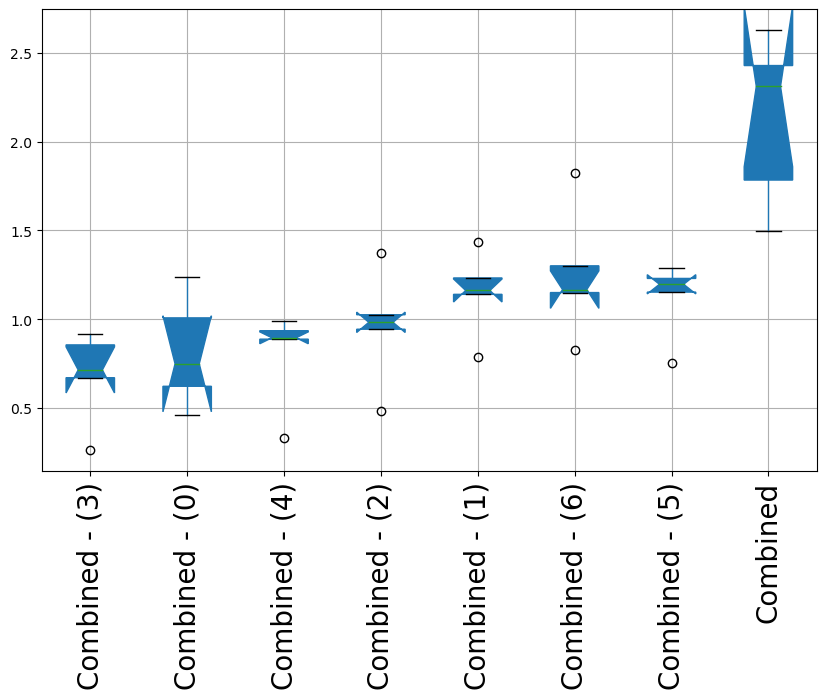

In [10]:
median_score.sort_values(ascending=True, inplace=True)
scores = scores[median_score.index]
plt.figure(figsize=(10,6))
scores.boxplot(patch_artist=True, notch=True)
plt.xticks(rotation=90, size=20)
plt.show()